In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import os
import cv2
import numpy as np
import tensorflow as tf
import scipy

from models import network, model_utils, inception_v1


os.sys.path.append("C:\\Users\\Tom\\Workspace\\KeywordSearch\\tensorflow")

In [2]:
folder = "C:\\Users\\Tom\\Workspace\\KeywordSearch\\edges\\img"
filenames = [os.path.join(folder, f) for f in os.listdir(folder)]
selected_neuron = 888 #888 - computer; 696 - screen; 694 - keyboard; 692 - mouse; 960 - computer

@tf.RegisterGradient("GuidedRelu")
def _GuidedReluGrad(op, grad):
    gate_g = tf.cast(grad > 0, "float32")
    gate_y = tf.cast(op.outputs[0] > 0, "float32")
    return gate_y * gate_g * grad

In [3]:
def guided_backprop(grad):
    image_2d = np.sum(np.abs(grad), axis=2)

    vmax = np.percentile(image_2d, 99)
    vmin = np.min(image_2d)

    return np.clip((image_2d - vmin) / (vmax - vmin), 0, 1)

def print_guided_backprop(filename, guided_backprop, probability, image):
    print(filename)
    
    top_prob = np.argsort(probability)[::-1]
    for i in range(len(top_prob)):
        if top_prob[i] == selected_neuron:
            break
    print(i, ":", probability[selected_neuron])
    
    
    fig = plt.figure(dpi=180)
    fig.add_subplot(131)
    plt.imshow(guided_backprop, cmap=plt.cm.gray, vmin=0, vmax=1)
    
    res = scipy.misc.imresize(guided_backprop*255, (10,10))
    fig.add_subplot(132)
    plt.imshow(res, cmap=plt.cm.gray)
    fig.add_subplot(133)
    plt.imshow(image, vmin=0, vmax=1)
    
    #plt.show()
    r = filename[:-3].decode('ASCII')
    print(r)
    plt.savefig(r + "guided_backprop.jpg")

INFO:tensorflow:Restoring parameters from C:\Users\Tom\Workspace\KeywordSearch\tensorflow\bin\checkpoints\model_v1.ckpt-280000
>> Classification started with neuron 888


C:\Users\Tom\AppData\Local\conda\conda\envs\tf1.6_gpu\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


b'C:\\Users\\Tom\\Workspace\\KeywordSearch\\edges\\img\\20160815_051009_000.jpg'
13 : 0.016636247
C:\Users\Tom\Workspace\KeywordSearch\edges\img\20160815_051009_000.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


b'C:\\Users\\Tom\\Workspace\\KeywordSearch\\edges\\img\\20160815_051713_000.jpg'
279 : 0.00012953718
C:\Users\Tom\Workspace\KeywordSearch\edges\img\20160815_051713_000.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


b'C:\\Users\\Tom\\Workspace\\KeywordSearch\\edges\\img\\20160815_051847_000.jpg'
587 : 2.7009379e-05
C:\Users\Tom\Workspace\KeywordSearch\edges\img\20160815_051847_000.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


b'C:\\Users\\Tom\\Workspace\\KeywordSearch\\edges\\img\\20160815_052108_000.jpg'
362 : 0.00021138093
C:\Users\Tom\Workspace\KeywordSearch\edges\img\20160815_052108_000.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


b'C:\\Users\\Tom\\Workspace\\KeywordSearch\\edges\\img\\20160815_053132_000.jpg'
65 : 0.0010791844
C:\Users\Tom\Workspace\KeywordSearch\edges\img\20160815_053132_000.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


b'C:\\Users\\Tom\\Workspace\\KeywordSearch\\edges\\img\\20160815_053219_000.jpg'
36 : 0.0011545011
C:\Users\Tom\Workspace\KeywordSearch\edges\img\20160815_053219_000.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


b'C:\\Users\\Tom\\Workspace\\KeywordSearch\\edges\\img\\20160815_053927_000.jpg'
544 : 8.346875e-05
C:\Users\Tom\Workspace\KeywordSearch\edges\img\20160815_053927_000.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


b'C:\\Users\\Tom\\Workspace\\KeywordSearch\\edges\\img\\20160815_054729_000.jpg'
40 : 0.0014345575
C:\Users\Tom\Workspace\KeywordSearch\edges\img\20160815_054729_000.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


b'C:\\Users\\Tom\\Workspace\\KeywordSearch\\edges\\img\\20160815_055519_000.jpg'
46 : 0.0019113716
C:\Users\Tom\Workspace\KeywordSearch\edges\img\20160815_055519_000.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


b'C:\\Users\\Tom\\Workspace\\KeywordSearch\\edges\\img\\20160815_061334_000.jpg'
215 : 4.8880007e-05
C:\Users\Tom\Workspace\KeywordSearch\edges\img\20160815_061334_000.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


b'C:\\Users\\Tom\\Workspace\\KeywordSearch\\edges\\img\\20160815_062124_000.jpg'
245 : 3.4984173e-06
C:\Users\Tom\Workspace\KeywordSearch\edges\img\20160815_062124_000.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


b'C:\\Users\\Tom\\Workspace\\KeywordSearch\\edges\\img\\20160815_062927_000.jpg'
0 : 0.5046428
C:\Users\Tom\Workspace\KeywordSearch\edges\img\20160815_062927_000.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


b'C:\\Users\\Tom\\Workspace\\KeywordSearch\\edges\\img\\20160815_064508_000.jpg'
0 : 0.20270151
C:\Users\Tom\Workspace\KeywordSearch\edges\img\20160815_064508_000.
>> Classification completed.


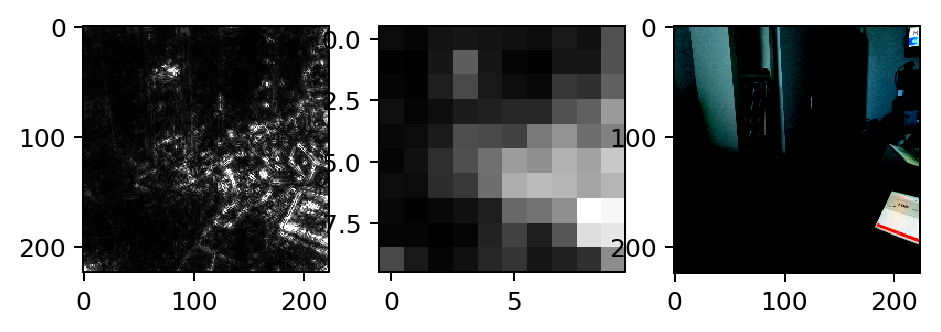

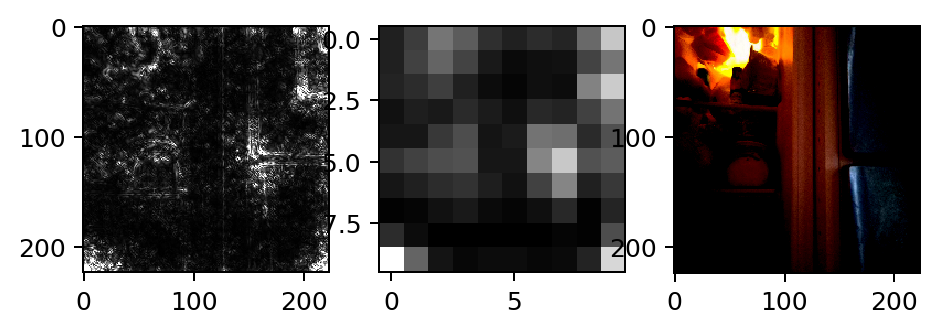

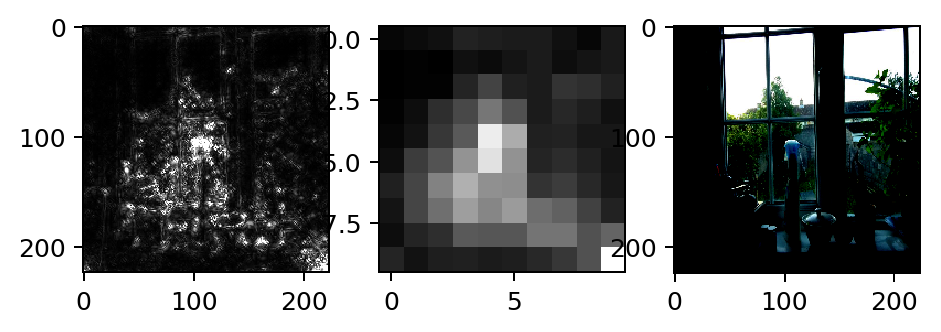

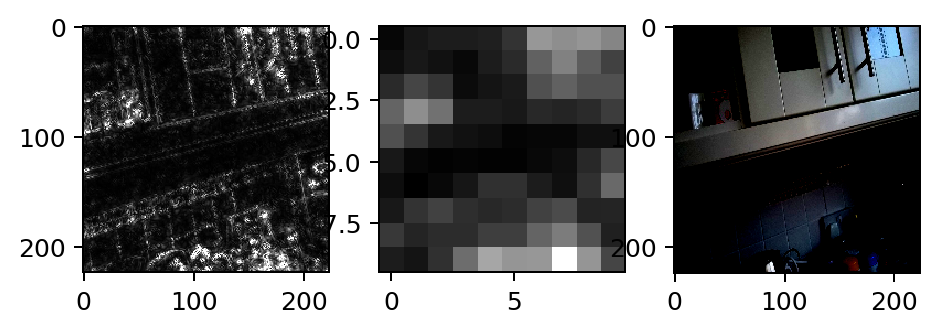

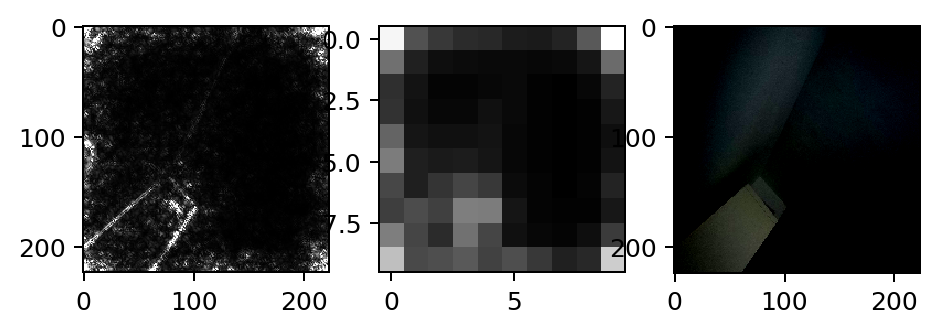

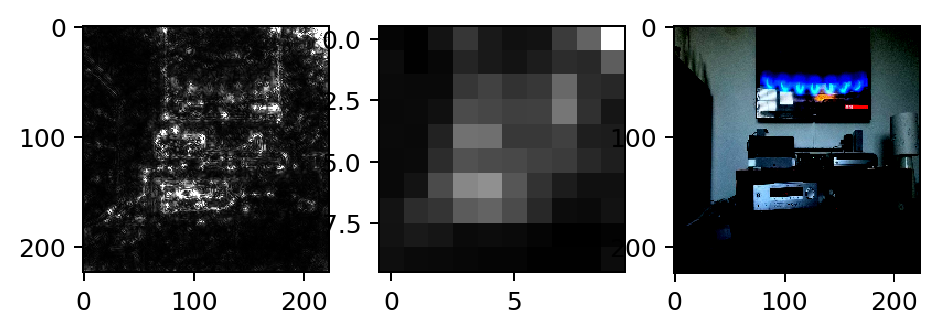

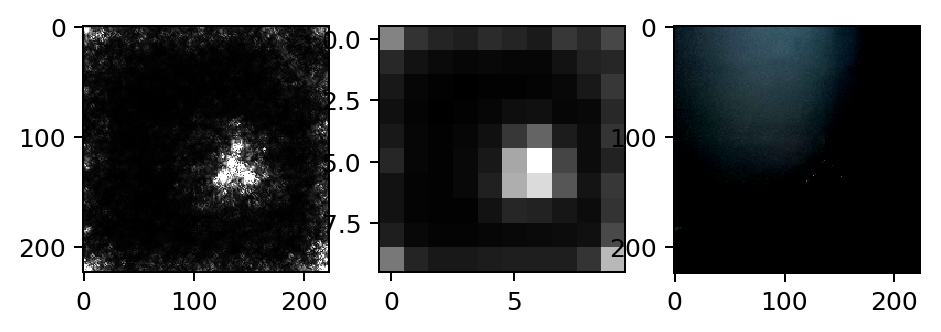

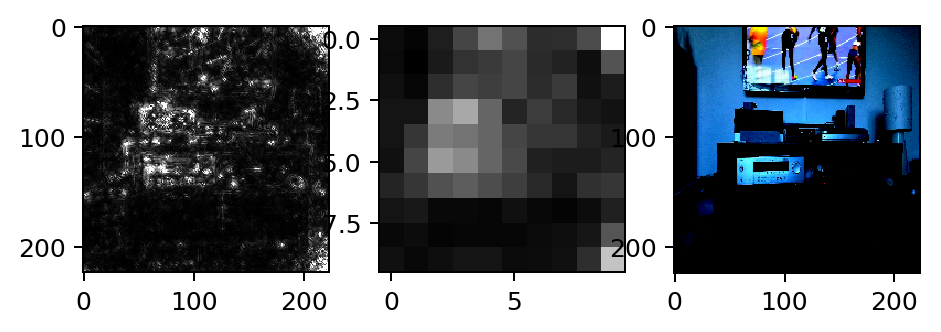

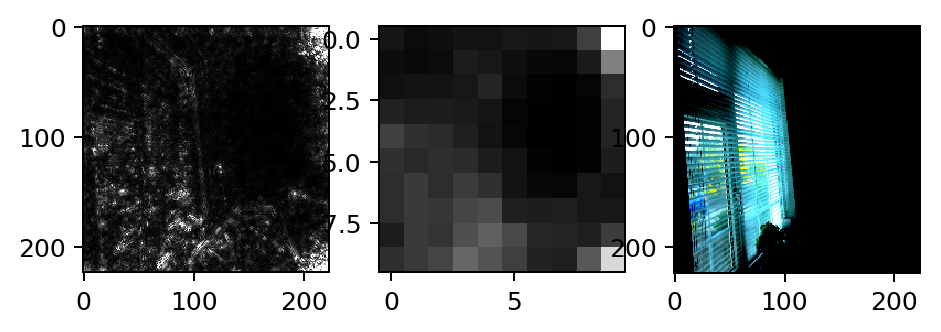

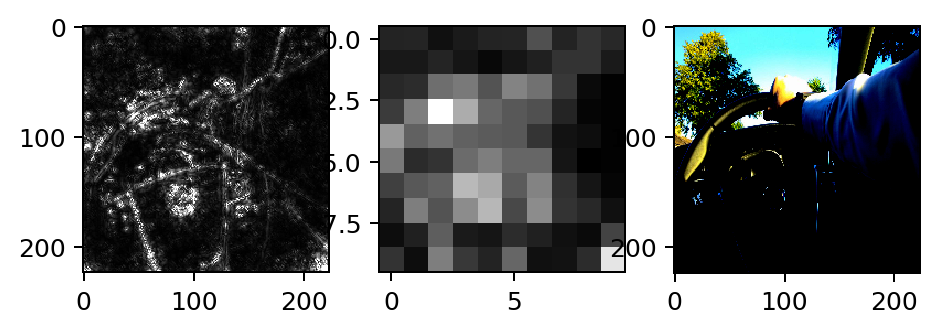

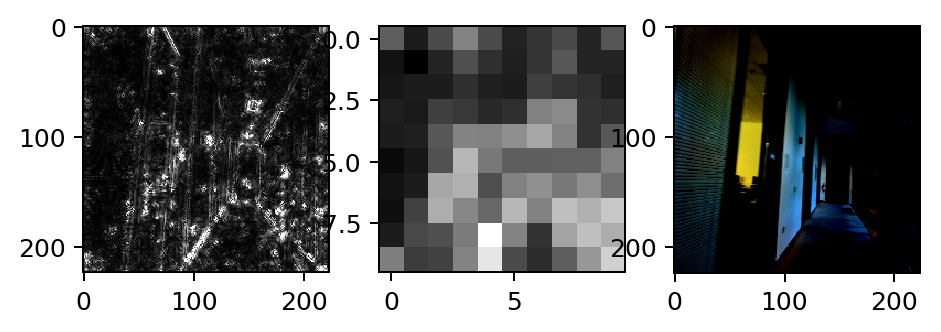

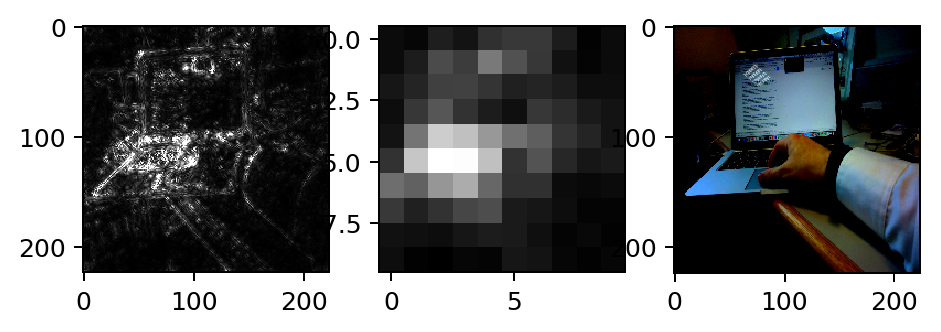

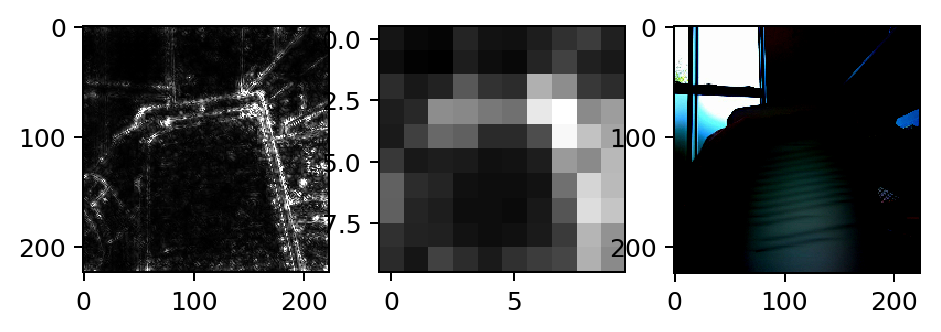

In [4]:
# mobile phone: 654
keys, images = network.get_image_as_batch(filenames, inception_v1.default_image_size, batch_size=1)

session = tf.Session()
session.run(tf.local_variables_initializer())

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=session, coord=coord)

neuron_selector = tf.placeholder(tf.int32)

with session.graph.gradient_override_map({'Relu': 'GuidedRelu'}):
    logits, end_points = network.build_net(images, 1390, scope='InceptionGeneralist', is_training=False)
    probabilities = tf.nn.softmax(logits, name='Probability')
    
    conv_layer = end_points["Mixed_5c"]
    target_neuron = logits[0][neuron_selector]
    grads = tf.gradients(target_neuron, images)[0]

session.run(tf.global_variables_initializer())
model_utils.restore_model(session, "C:\\Users\\Tom\\Workspace\\KeywordSearch\\tensorflow\\bin", None)



print(">> Classification started with neuron " + str(selected_neuron))

try:
    while not coord.should_stop():
        r_keys, r_prob, r_conv, r_grads, r_images = session.run([keys, probabilities, conv_layer, grads, images],
                                                                feed_dict={neuron_selector: selected_neuron})
        
        r_grad_cam = guided_backprop(r_grads[0])
        print_guided_backprop(r_keys[0], r_grad_cam, r_prob[0], r_images[0])
    
        for a in range(len(r_keys)):
            _, filename = os.path.split(r_keys[a])
            if isinstance(filenames, dict):
                file_id = filenames[r_keys[a].decode("utf-8")]
            else:
                file_id = int(filename[:-4])

            r_top_indexes = np.where(r_prob[a] >= 0.001)[0]
            m_len = len(r_top_indexes)
            r_top_vals = np.zeros(m_len)

            for b in range(m_len):
                r_top_vals[b] = r_prob[a][r_top_indexes[b]]
                
except tf.errors.OutOfRangeError:
    print(">> Classification completed.")
finally:
    # When done, ask the threads to stop.
    coord.request_stop()

    # Wait for threads to finish.
    coord.join(threads)
    session.close()
